## Score: 29

## Comment: 

<font color=Red>
Q1.[9] The central meridian(central_longitude) of the map projection should be modified to 180.
<br><br>
Q2.[10+10] Correct
<br><br>
</font>

D:\anaconda\envs\cper\lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


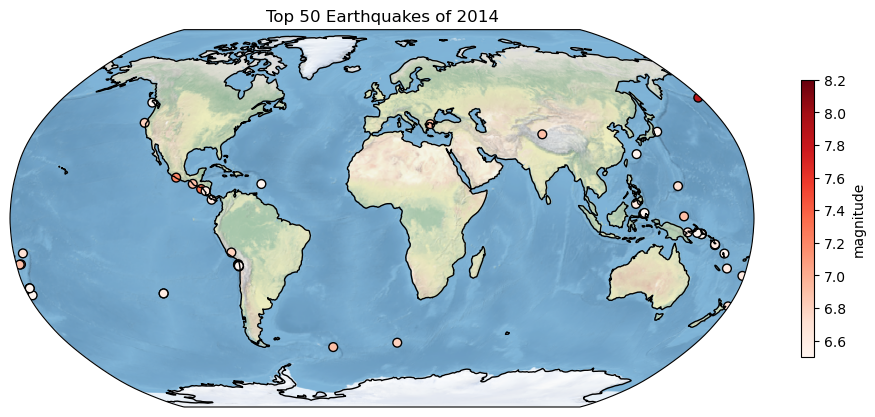

In [2]:
# Question_1
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
df = pd.read_csv(r"D:\ESE5023\data\usgs_earthquakes.csv")
top_50 = df.sort_values(by='mag', ascending=False).head(50)

plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.Robinson())
ax.stock_img()
ax.coastlines()
sc = ax.scatter(x=top_50['longitude'],
                y=top_50['latitude'],
                c=top_50['mag'],
                cmap='Reds',       
                edgecolors='black', 
                s=40,            
                transform=ccrs.PlateCarree())
plt.title('Top 50 Earthquakes of 2014')
plt.colorbar(sc, label='magnitude', shrink=0.6)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
D:\anaconda\envs\cper\lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


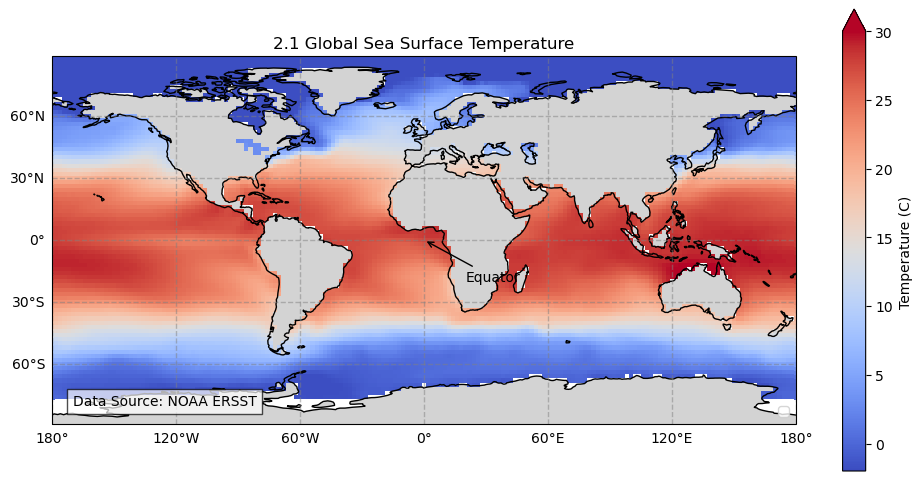

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


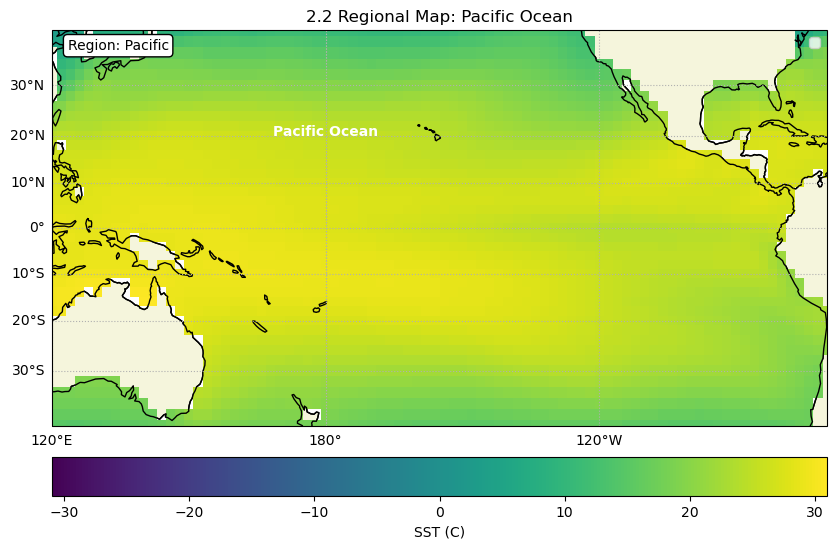

In [3]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr
import numpy as np

file_path = r"D:\ESE5023\data\NOAA_NCDC_ERSST_v3b_SST.nc"
ds = xr.open_dataset(file_path)
data = ds['sst'].isel(time=0)

# 2.1 Global Map
plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# 掩膜/特征: 添加陆地和海岸线
ax.add_feature(cfeature.LAND, facecolor='lightgray', label='Land') 
ax.coastlines()

# 色条
p = data.plot(ax=ax, transform=ccrs.PlateCarree(), 
              cmap='coolwarm', vmin=-2, vmax=30,
              cbar_kwargs={'label': 'Temperature (C)'})

# 网格线_X轴标签和刻度_Y轴标签和刻度
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False # 关掉上面的标签，保持整洁
gl.right_labels = False

# 标题
plt.title('2.1 Global Sea Surface Temperature')

# 注释：添加一个箭头指向赤道
ax.annotate('Equator', xy=(0, 0), xytext=(20, -20),
            arrowprops=dict(facecolor='black', arrowstyle='->'),
            transform=ccrs.PlateCarree())

# 文本框：在左下角写上数据来源
ax.text(-170, -80, 'Data Source: NOAA ERSST', 
        bbox=dict(facecolor='white', alpha=0.7),
        transform=ccrs.PlateCarree())

# 图例
plt.legend(loc='lower right')

plt.show()

# 2.2 Regional Map
plt.figure(figsize=(10, 8))
# 不同的投影方式: 使用 Mercator
ax2 = plt.axes(projection=ccrs.Mercator(central_longitude=180))

# 设定显示范围 (太平洋区域)
ax2.set_extent([120, 290, -40, 40], crs=ccrs.PlateCarree())

# 掩膜/特征
ax2.add_feature(cfeature.LAND, facecolor='beige', edgecolor='black', label='Land')
ax2.coastlines()

# 色条
p2 = data.plot(ax=ax2, transform=ccrs.PlateCarree(), 
               cmap='viridis',
               cbar_kwargs={'label': 'SST (C)', 'orientation': 'horizontal', 'pad': 0.05})

# 网格线
# X/Y轴 标签和刻度
gl2 = ax2.gridlines(draw_labels=True, linestyle=':')
gl2.top_labels = False

# 标题
plt.title('2.2 Regional Map: Pacific Ocean')

# 注释: 标出夏威夷附近
ax2.annotate('Pacific Ocean', xy=(180, 0), xytext=(180, 20),
             color='white', weight='bold', ha='center',
             transform=ccrs.PlateCarree())

# 文本框
ax2.text(0.02, 0.95, 'Region: Pacific', transform=ax2.transAxes,
         bbox=dict(boxstyle="round", fc="w"))

# 图例
plt.legend(loc='upper right')

plt.show()